In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_validate
df = pd.read_csv('ccdefault.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
df.shape

(30000, 25)

# Part 1: Random test train splits

Data cleaning

In [6]:
X=df.drop(['ID','DEFAULT'],axis=1).values
y=df['DEFAULT'].values
print(X.shape,y.shape)
print(X[0], y[0])

(30000, 23) (30000,)
[20000     2     2     1    24     2     2    -1    -1    -2    -2  3913
  3102   689     0     0     0     0   689     0     0     0     0] 1


Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
scores_train=[]
scores_test=[]
tree = DecisionTreeClassifier(criterion='gini',max_depth=20)
start = time.process_time()
for n in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=n)
    tree.fit(X_train,y_train)
    y_train_pred1 = tree.predict(X_train)
    y_pred1 = tree.predict(X_test)
    scores_train.append(metrics.accuracy_score(y_train, y_train_pred1))
    scores_test.append(metrics.accuracy_score(y_test, y_pred1))
    end = time.process_time()

scores_train:[0.9421481481481482, 0.9471111111111111, 0.9438518518518518, 0.943962962962963, 0.9382592592592592, 0.9480740740740741, 0.9408518518518518, 0.9314814814814815, 0.9445185185185185, 0.9431851851851852]
scores_test:[0.77, 0.763, 0.764, 0.7513333333333333, 0.771, 0.7486666666666667, 0.7766666666666666, 0.763, 0.7626666666666667, 0.7753333333333333]
The mean of scores_train:0.9423444444444445
The std of scores_train:0.004503711318219694
The mean of scores_test:0.7645666666666667
The std of scores_test:0.008775027698595084
Run time:  6.171875 s


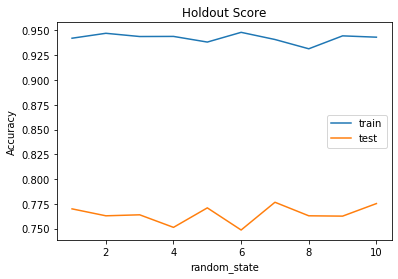

In [17]:
print("scores_train:"+str(scores_train))
print("scores_test:"+str(scores_test))
print("The mean of scores_train:"+str(np.mean(scores_train)))
print("The std of scores_train:"+str(np.std(scores_train)))
print("The mean of scores_test:"+str(np.mean(scores_test)))
print("The std of scores_test:"+str(np.std(scores_test)))
print('Run time: ', end - start, 's')
plt.title('Holdout Score')
plt.plot(range(1,11),scores_train)
plt.plot(range(1,11),scores_test)
plt.legend(['train', 'test'])
plt.xlabel('random_state')
plt.ylabel('Accuracy')
plt.show()

# Part 2: Cross validation

K_fold with n=10

The train score is :[0.93885185 0.93818519 0.93881481 0.94818519 0.9477037  0.95066667
 0.95225926 0.94355556 0.94188889 0.94140741]
The mean of train score:0.9441518518518517
The std of train score is:0.004921787456762767
The scores of test score:[0.75233333 0.75566667 0.76166667 0.74166667 0.744      0.76366667
 0.765      0.774      0.77       0.76766667]
The mean of test score:0.7595666666666666
The std of test score:0.010314014198598384
Run time:  6.28125 s


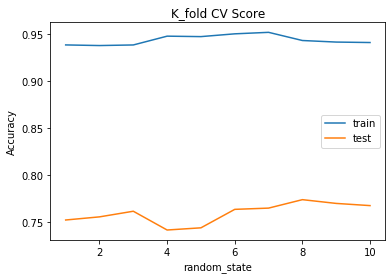

In [18]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
start2 = time.process_time()
scores = cross_validate(tree,X,y,cv=skf,scoring='accuracy',return_train_score=True)
print("The train score is :"+str(scores['train_score']))
print("The mean of train score:"+str(np.mean(scores['train_score'])))
print("The std of train score is:"+str(np.std(scores['train_score'])))
print("The scores of test score:"+str(scores['test_score']))
print("The mean of test score:"+str(np.mean(scores['test_score'])))
print("The std of test score:"+str(np.std(scores['test_score'])))
end2 = time.process_time()
print('Run time: ', end2 - start2, 's')
plt.title('K_fold CV Score')
plt.plot(range(1,11),scores['train_score'])
plt.plot(range(1,11),scores['test_score'])
plt.legend(['train', 'test'])
plt.xlabel('random_state')
plt.ylabel('Accuracy')
plt.show()


In [39]:
print("My name is Zhiyi Ye")
print("My NetID is: zhiyiye2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zhiyi Ye
My NetID is: zhiyiye2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
